Disclaimer: This code was developed after learning from a demonstrative example in one of my Udemy courses. I do not intend to violate any copyright laws; rather, my goal is to demonstrate the skills I acquired through the course and highlight some of the machine learning projects I have completed.

Link to the udemy course:https://www.udemy.com/course/deep-learning-machine-learning-practical/learn/lecture/14989280#overview

**Import Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
with open ("./traffic-signs-data/train.p", mode='rb') as training_data:
    train=pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test=pickle.load(testing_data)

In [4]:
x_train,y_train=train['features'], train['labels']
x_validate, y_validate=valid['features'],valid['labels']
x_testing,y_testing=test['features'],test['labels']

In [5]:
x_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape #corresponding lable or class

(34799,)

In [7]:
x_validate.shape

(4410, 32, 32, 3)

In [8]:
y_validate.shape

(4410,)

In [9]:
x_testing.shape

(12630, 32, 32, 3)

In [10]:
y_testing.shape

(12630,)

**Exploring the Data/Image**

36

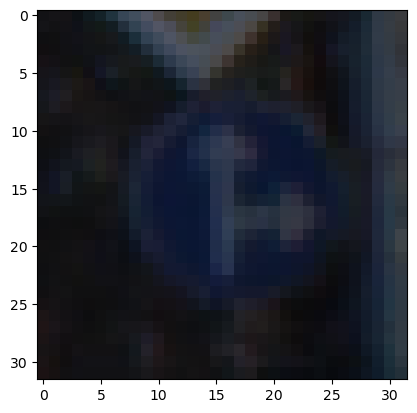

In [12]:
i=1000
plt.imshow(x_train[i])
y_train[i]

23

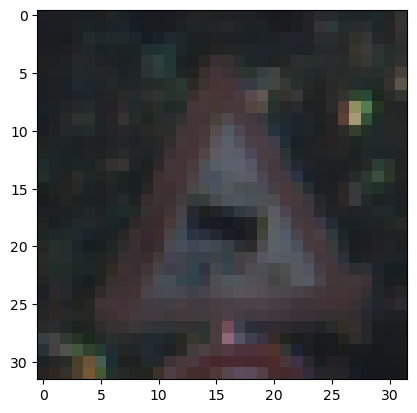

In [13]:
i=2000
plt.imshow(x_train[i])
y_train[i]

1

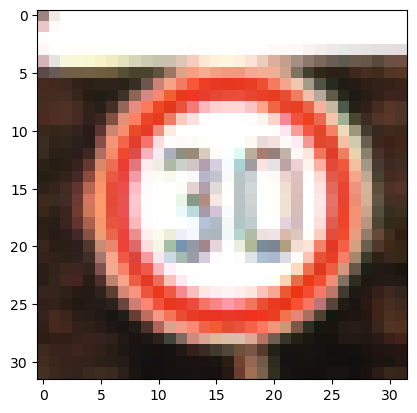

In [14]:
i=3000
plt.imshow(x_train[i])
y_train[i]

25

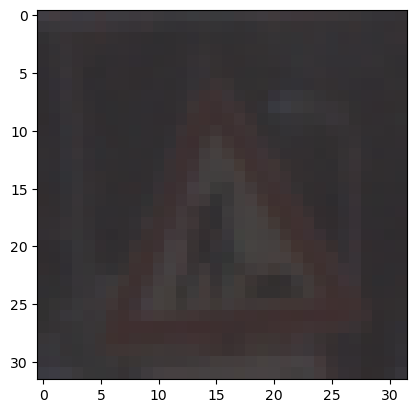

In [15]:
i=4400
plt.imshow(x_validate[i])
y_validate[i]

17

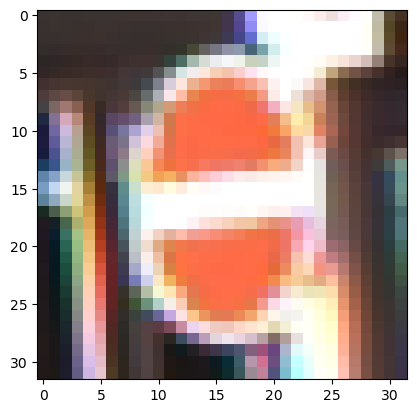

In [16]:
i=4000
plt.imshow(x_validate[i])
y_validate[i]

34

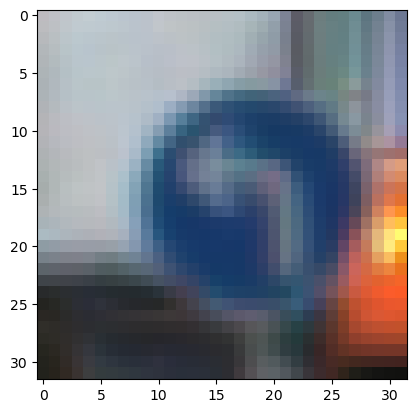

In [17]:
i=2000
plt.imshow(x_testing[i])
y_testing[i]

11

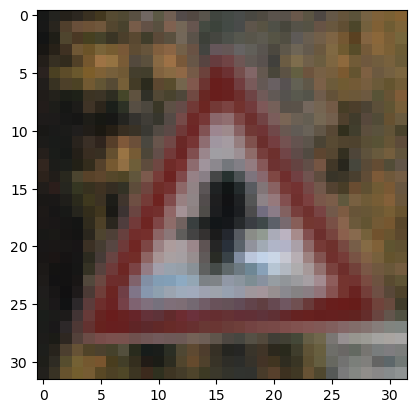

In [18]:
i=3000
plt.imshow(x_testing[i])
y_testing[i]

**Preparing the Data**

In [20]:
from sklearn.utils import shuffle
x_train,y_train=shuffle(x_train, y_train)

In [21]:
x_train_gray=np.sum(x_train/3, axis=3, keepdims=True)
x_validate_gray=np.sum(x_validate/3, axis=3, keepdims=True)
x_testing_gray=np.sum(x_testing/3, axis=3, keepdims=True)

In [22]:
x_train_gray.shape

(34799, 32, 32, 1)

In [23]:
x_validate_gray.shape

(4410, 32, 32, 1)

In [24]:
x_testing_gray.shape

(12630, 32, 32, 1)

In [25]:
#normalization
x_train_gray_norm=(x_train_gray-128)/128
x_validate_gray_norm=(x_validate_gray-128)/128
x_testing_gray_norm=(x_testing_gray-128)/128

In [26]:
x_train_gray_norm

array([[[[-0.58854167],
         [-0.6328125 ],
         [-0.640625  ],
         ...,
         [-0.609375  ],
         [-0.6171875 ],
         [-0.62760417]],

        [[-0.56770833],
         [-0.63020833],
         [-0.62760417],
         ...,
         [-0.60677083],
         [-0.60416667],
         [-0.61458333]],

        [[-0.60677083],
         [-0.6171875 ],
         [-0.59895833],
         ...,
         [-0.59895833],
         [-0.59895833],
         [-0.60677083]],

        ...,

        [[-0.671875  ],
         [-0.68489583],
         [-0.69270833],
         ...,
         [-0.68229167],
         [-0.6953125 ],
         [-0.68489583]],

        [[-0.67708333],
         [-0.6796875 ],
         [-0.68229167],
         ...,
         [-0.67708333],
         [-0.6875    ],
         [-0.68229167]],

        [[-0.6796875 ],
         [-0.68489583],
         [-0.68489583],
         ...,
         [-0.67447917],
         [-0.6875    ],
         [-0.6796875 ]]],


       [[[-0.0625    ],


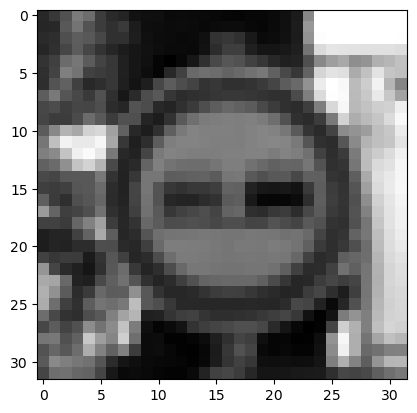

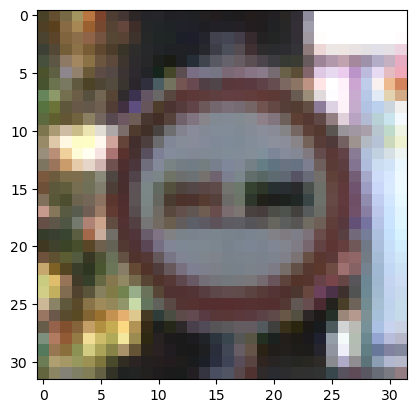

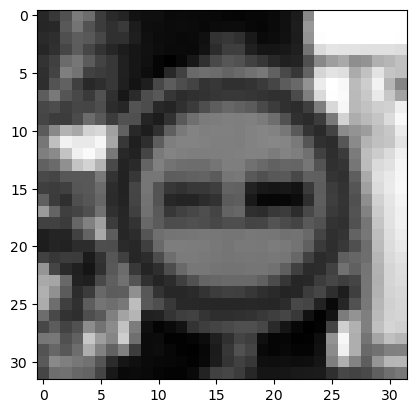

In [27]:
i=610
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap='gray')


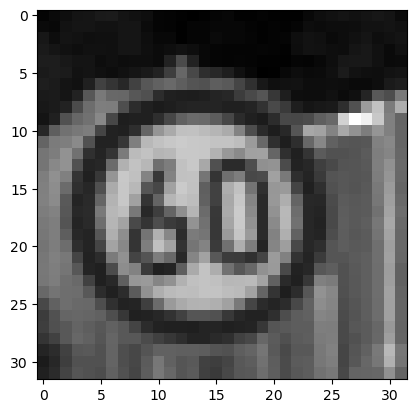

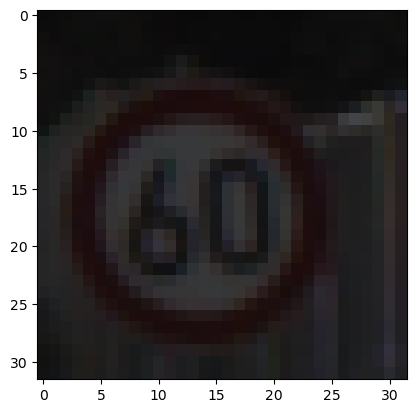

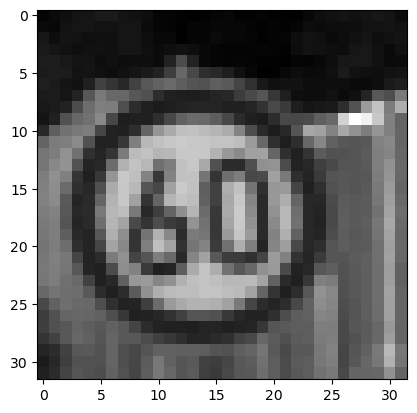

In [28]:
i=800
plt.imshow(x_validate_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_validate[i])
plt.figure()
plt.imshow(x_validate_gray_norm[i].squeeze(), cmap='gray')

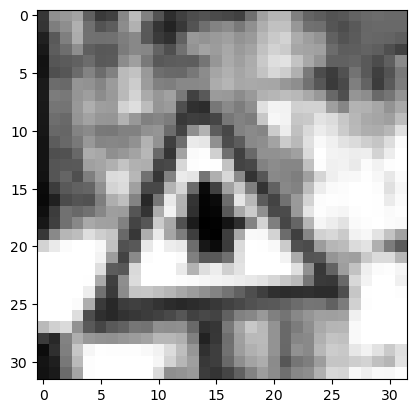

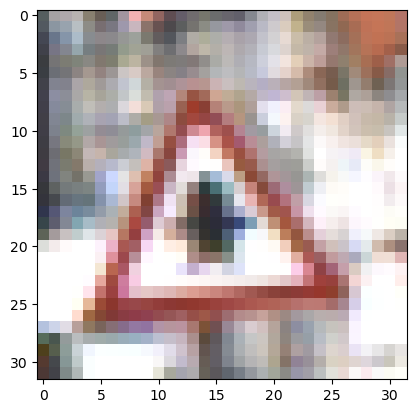

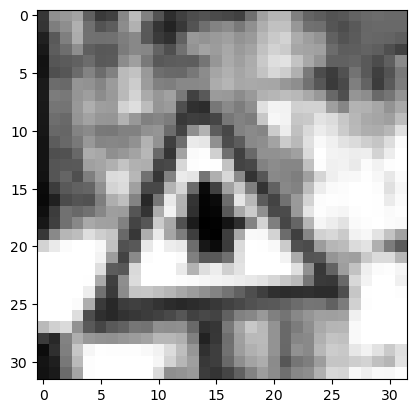

In [29]:
i=900
plt.imshow(x_testing_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_testing[i])
plt.figure()
plt.imshow(x_testing_gray_norm[i].squeeze(), cmap='gray')

**Training Model**

In [31]:
#Import 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [32]:
#Bulding the ML Model
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation='softmax'))

In [33]:
#Compiling and Training The Model
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [75]:
history=cnn_model.fit(x_train_gray_norm, 
              y_train,
              batch_size=500,
              epochs=5,
              verbose=1,
              validation_data=(x_validate_gray_norm, y_validate))

Epoch 1/5
70/70 [==============================] - 7s 94ms/step - loss: 0.4457 - accuracy: 0.8797 - val_loss: 0.7157 - val_accuracy: 0.7952
Epoch 2/5
70/70 [==============================] - 6s 83ms/step - loss: 0.3842 - accuracy: 0.8956 - val_loss: 0.6856 - val_accuracy: 0.8050
Epoch 3/5
70/70 [==============================] - 6s 84ms/step - loss: 0.3373 - accuracy: 0.9111 - val_loss: 0.6974 - val_accuracy: 0.8014
Epoch 4/5
70/70 [==============================] - 6s 85ms/step - loss: 0.3001 - accuracy: 0.9204 - val_loss: 0.6671 - val_accuracy: 0.8152
Epoch 5/5
70/70 [==============================] - 6s 83ms/step - loss: 0.2667 - accuracy: 0.9312 - val_loss: 0.6632 - val_accuracy: 0.8109


**Model Evaluation**

In [77]:
score=cnn_model.evaluate(x_testing_gray_norm, y_testing)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 3s 8ms/step - loss: 1.0175 - accuracy: 0.8048
Test Accuracy: 0.8047506213188171


In [78]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [86]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


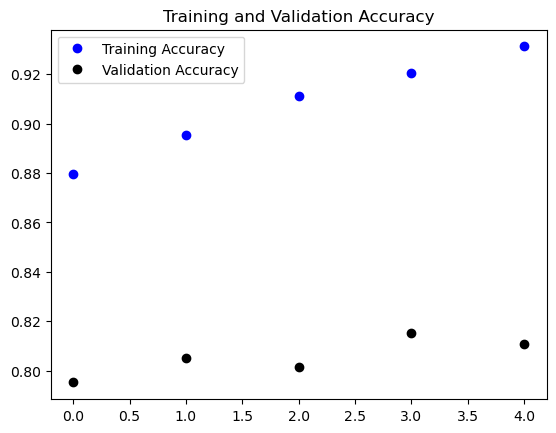

In [94]:
epochs=range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ko', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

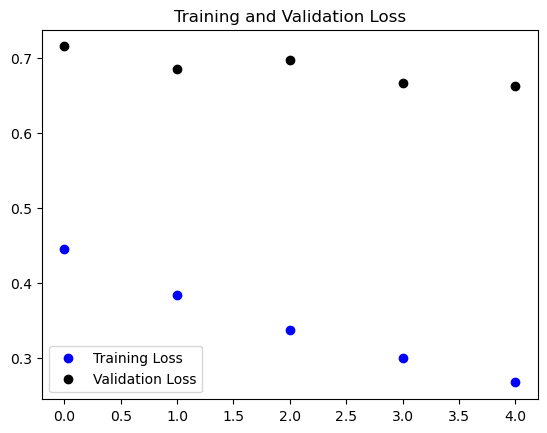

In [102]:
epochs=range(len(accuracy))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'ko', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [104]:
#Making Predictions
predicted_classes=cnn_model.predict(x_testing_gray_norm)
y_true=y_testing

395/395 [==============================] - 3s 8ms/step


In [118]:
# from sklearn.metrics import confusion_matrix
# cmatrix=confusion_matrix(y_true, predicted_classes)
#plt.figure(figsize=(25,25))
# sns.heatmap(cmatrix, annot=True)

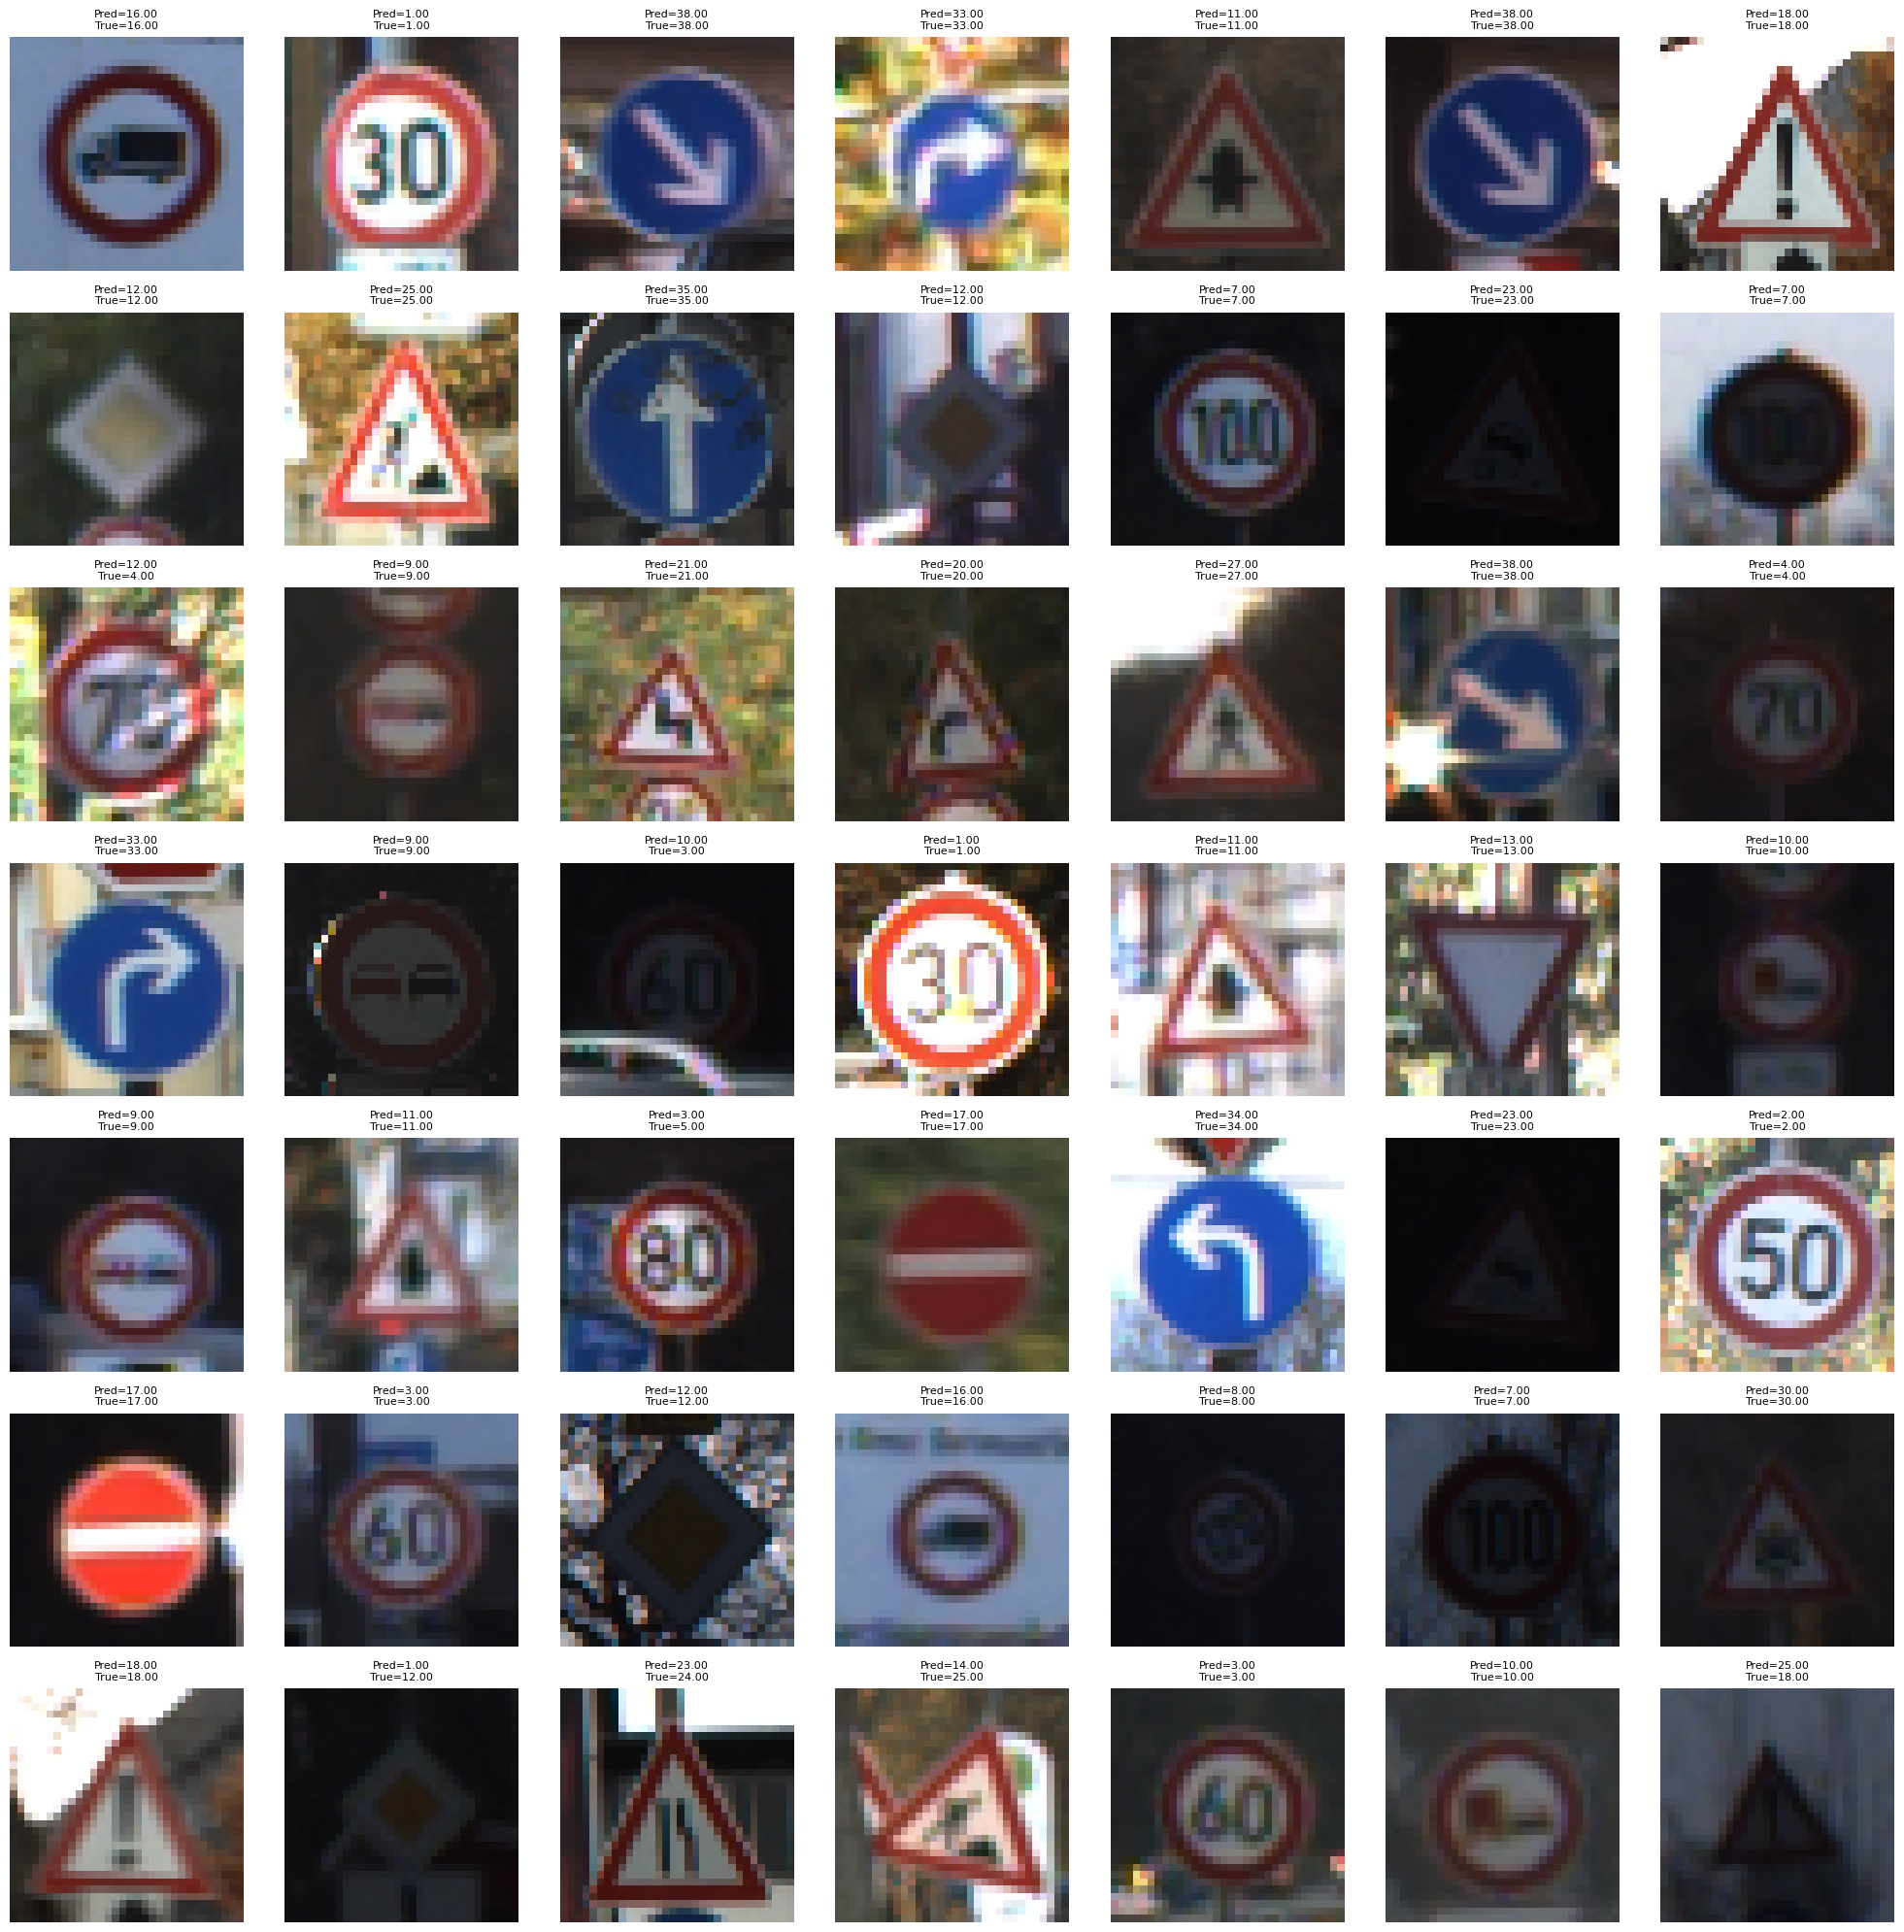

In [139]:
# L=7
# W=7

# fig, axes = plt.subplots(L,W,figsize=(20,20))
# axes=axes.ravel()

# for i in np.arange(0, L*W):
#     axes[i].imshow(x_testing[i])
#     axes[i].set_title('Prediction={}\n True={}'.format(predicted_classes[i], y_true[i]))

L = 7
W = 7

# Create the figure and axes
fig, axes = plt.subplots(L, W, figsize=(20, 20))
axes = axes.ravel()

# Iterate over all the images and display them
for i in np.arange(0, L * W):
    axes[i].imshow(x_testing[i])
    
    # For classification problems with predicted probabilities, use np.argmax() to get the predicted class
    pred_class = np.argmax(predicted_classes[i]) if isinstance(predicted_classes[i], np.ndarray) else predicted_classes[i]
    true_class = y_true[i]  # Assuming this is already a scalar class label
    
    # Shortened titles with prediction and true values to 2 decimal places
    axes[i].set_title(f'Pred={pred_class:.2f}\nTrue={true_class:.2f}', fontsize=8)
    axes[i].axis('off')  # Hide the axis to prevent overlap

# Adjust the spacing between subplots and make layout tight
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust spacing between images
plt.tight_layout()  # Automatically adjust subplot parameters to give more room for labels

# Show the plot
plt.show()
